In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Fig S8

In [2]:
def exposed_pops(year):
    ejscreen = pd.read_csv('Allocation to Census tracts_v3/population_results/heatmaps/ejscreen_impacted_{}.csv'.format(year))
    if year > 2020 and year < 2060:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_2022-2060.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    elif year < 2010:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_1990-2009.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    else:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_{}.csv".format(year))
    ct_pop['GEOID'] = ct_pop['GEO_ID'].str[9:]
    ct_pop['GEOID'] = ct_pop['GEOID'].astype(int64)
    sample_pfas = ejscreen.merge(ct_pop, on='GEOID', how='left')

    for i in range(1, 10):
        sample_pfas[f'pfas_only_{i+1}'] = sample_pfas[f'pfas_within_{i+1}'] - sample_pfas[f'pfas_within_{i}']
    sample_pfas['pfas_only_1'] = sample_pfas['pfas_within_1']
    sample_pfas['less_than_2'] = sample_pfas['pfas_within_2']
    sample_pfas['less_than_2-5'] = sample_pfas['pfas_within_5'] - sample_pfas['pfas_within_2']
    sample_pfas['less_than_5-10'] = sample_pfas['pfas_within_10'] - sample_pfas['pfas_within_5']
    less_than_1_sum = sample_pfas[sample_pfas['less_than_2']>0]['POP'].sum()
    less_than_1_5_sum = sample_pfas[sample_pfas['less_than_2-5']>0]['POP'].sum()
    less_than_5_10_sum = sample_pfas[sample_pfas['less_than_5-10']>0]['POP'].sum()

    return less_than_1_sum, less_than_1_5_sum, less_than_5_10_sum

In [20]:
def exposed_pops_df(year):
    ejscreen = pd.read_csv('Allocation to Census tracts_v3/population_results/heatmaps/ejscreen_impacted_{}.csv'.format(year))
    if year > 2020 and year < 2060:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_2022-2060.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    elif year < 2010:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_1990-2009.csv")
        ct_pop['POP'] = ct_pop[f'{year}']
    else:
        ct_pop = pd.read_csv("Census tracts' Population/Census tracts' Population/CT_Population_{}.csv".format(year))
    ct_pop['GEOID'] = ct_pop['GEO_ID'].str[9:]
    ct_pop['GEOID'] = ct_pop['GEOID'].astype(int64)
    sample_pfas = ejscreen.merge(ct_pop, on='GEOID', how='left')

    return sample_pfas

In [3]:
less_than_2_sum_list = []
less_than_2_5_sum_list = []
less_than_5_10_sum_list = []

for year in [1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060]:
    print(year)
    less_than_2_sum, less_than_2_5_sum, less_than_5_10_sum = exposed_pops(year)
    less_than_2_sum_list.append(less_than_2_sum)
    less_than_2_5_sum_list.append(less_than_2_5_sum)
    less_than_5_10_sum_list.append(less_than_5_10_sum)

1990
2000
2010
2020
2030
2040
2050
2060


In [4]:
df = pd.DataFrame({'year': [1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060],
    'less_than_2_sum': less_than_2_sum_list,
    'less_than_2_5_sum': less_than_2_5_sum_list,
    'less_than_5_10_sum': less_than_5_10_sum_list})

df['less_than_2_sum'] = df['less_than_2_sum']/1000000
df['less_than_2_5_sum'] = df['less_than_2_5_sum']/1000000
df['less_than_5_10_sum'] = df['less_than_5_10_sum']/1000000

In [5]:
df

,year,less_than_2_sum,less_than_2_5_sum,less_than_5_10_sum
0,1990,0.389783,1.989405,5.888494
1,2000,0.335332,1.807808,5.325099
2,2010,0.315876,1.770090,5.271200
3,2020,0.421195,2.456679,6.820208
4,2030,0.452004,2.618702,7.263209
5,2040,0.468595,2.747097,7.628879
6,2050,0.485163,2.853296,7.895741
7,2060,0.501466,2.964396,8.197819


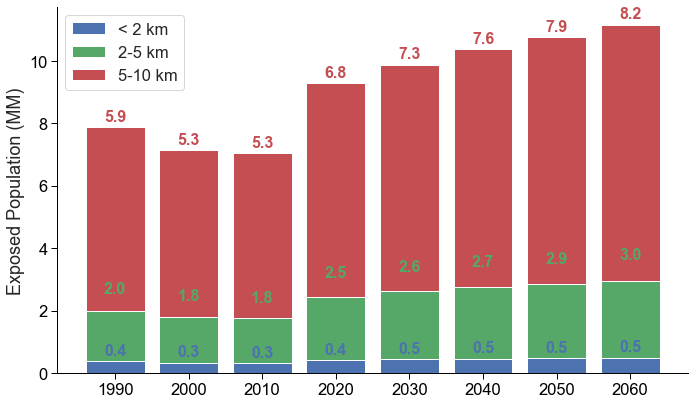

In [16]:
sns.set(style='white', font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 6))
barWidth = 8

bars1 = plt.bar(df['year'], df['less_than_2_sum'], color='b', edgecolor='white', width=barWidth, label='< 2 km')
bars2 = plt.bar(df['year'], df['less_than_2_5_sum'], bottom=df['less_than_2_sum'], color='g', edgecolor='white', width=barWidth, label='2-5 km')
bars3 = plt.bar(df['year'], df['less_than_5_10_sum'], bottom=df['less_than_2_5_sum'], color='r', edgecolor='white', width=barWidth, label='5-10 km')

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=16, color='b', fontweight='bold')
for bar in bars2:
    height = bar.get_height() + bar.get_y()
    ax.annotate(f'{bar.get_height():.1f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=16, color='g', fontweight='bold')
for bar in bars3:
    height = bar.get_height() + bar.get_y()
    ax.annotate(f'{bar.get_height():.1f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=16, color='r', fontweight='bold')
    
plt.xticks(df['year'])
plt.ylabel('Exposed Population (MM)')
plt.legend(loc='upper left')
# plt.xlabel('Year')

ax.set_facecolor('white')  # Set the background color to white
for spine in ax.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
# plt.savefig('exposure_trends_km.png', dpi=1500, bbox_inches='tight')
# plt.savefig('exposure_trends_km.pdf')

In [ ]:
def ejscreen_year_analysis(year):
    ejscreen = pd.read_csv('Allocation to Census tracts_v3/population_results/heatmaps/ejscreen_impacted_{}.csv'.format(year))
    # ejscreen['weighted_exposure'] = sum((1/(i+1)) * ejscreen[f'pfas_within_{i+1}'] for i in range(10))
    # ejscreen['weighted_exposure_log'] = np.log(ejscreen['weighted_exposure'] + 1)
    for i in range(1, 10):
        ejscreen[f'pfas_only_{i+1}'] = ejscreen[f'pfas_within_{i+1}'] - ejscreen[f'pfas_within_{i}']
    ejscreen['pfas_only_1'] = ejscreen['pfas_within_1']
    ejscreen['weighted_exposure'] = sum((1/(i+1)) * ejscreen[f'pfas_only_{i+1}'] for i in range(10))
    ejscreen['weighted_exposure_log'] = np.log(ejscreen['weighted_exposure'] + 1)
    return ejscreen

def ols_df_process(year):
    ejscreen_og = pd.read_csv('EJSCREEN/EJSCREEN_2023_Tracts_with_AS_CNMI_GU_VI_csv/EJSCREEN_2023_Tracts_with_AS_CNMI_GU_VI.csv')
    ejscreen = ejscreen_year_analysis(year)
    ols_df = ejscreen_og[['OID_', 'PEOPCOLORPCT', 'P_D2_PM25', 'P_D2_DSLPM', 'P_D2_PNPL', 'P_D2_PRMP', 'P_D2_PWDIS']].merge(ejscreen[['OID_', 'weighted_exposure'] + ['pfas_within_' + str(i+1) for i in range(10)]], on='OID_', how='left')
    for col in ['pfas_within_' + str(i+1) for i in range(10)] + ['weighted_exposure']:
        ols_df[col] = ols_df[col].fillna(0)
    ols_df['weighted_exposure_log'] = np.log(ols_df['weighted_exposure'] + 1)
    ols_df.dropna(inplace=True)
    ols_df.reset_index(drop=True, inplace=True)
    for col in ['P_D2_PM25', 'P_D2_DSLPM', 'P_D2_PNPL', 'P_D2_PRMP', 'P_D2_PWDIS']:
        ols_df[col] = ols_df[col]/100
    return ols_df

### Fig 2. Distribution of county-level carpet PFAS per capita in-use emissions under high estimate (status quo - 2020)

In [40]:
counties = gpd.read_file('assignment/tiger/counties/tl_2022_us_county/tl_2022_us_county.shp')
counties['GEOID'] = counties['GEOID'].astype(int)

pchigh = pd.read_csv('County level analysis/Data source/PC_InUseEmiss_High_StatusQuo.csv')
pchigh = counties[['GEOID', 'geometry']].merge(pchigh, left_on='GEOID', right_on='GeoID', how='inner')
pchigh['State'] = pchigh['County,State'].str.split(', ').str[1]

pchigh['2020_pct'] = pchigh['2020'].rank(pct=True)
pchigh['2020_1990_diff'] = pchigh['2020'] - pchigh['1990']

In [42]:
column_to_plot = '2020_pct'
cols_to_remove = ['geometry', 'GEOID', 'GeoID', 'StID', 'County,State', 'State', '2020_pct', '2020_1990_diff']

gdf = pchigh[~pchigh['State'].isin(['Hawaii', 'Alaska'])]
gdf_sub = gdf.drop(columns=cols_to_remove)

In [ ]:
import matplotlib.colors as mcolors
colormap = plt.cm.tab20  # Using the 'tab20' colormap which has 20 distinct colors

years = list(range(1990, 2061))

sns.set(style='white', font_scale=2)  # Set style and font size
fig, ax = plt.subplots(figsize=(10, 10)) 
# for index, row in gdf_sub.iterrows():
#     plt.plot(years, row, color='grey', linewidth=0.05)

highlighted = {
    1092: 'Coweta County, GA',
    1930: 'Cook County, MN',
    2671: 'Keweenaw County, MI'
}
highlight_colors = {
    1092: 'red',
    1930: 'blue',
    2671: 'green'
}
# Plot each row as a line
for index, row in gdf_sub.iterrows():
    if index in highlighted:
        if index == 2671:
            plt.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            plt.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-25], row.iloc[-1]-2),
                fontsize=16, color=highlight_colors[index])
        else:
            plt.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            plt.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-1]),
                fontsize=16, color=highlight_colors[index])

    else:
        plt.plot(years, row, color='grey', linewidth=0.05)  # Regular lines

ax.set_facecolor('white')  # Set the background color to white
for spine in ax.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set labels and title
# plt.xlabel('Year')
plt.ylabel('per capita in-use emissions (mg/cap/year)')
# plt.title('Yearly Values for Each Row')
# plt.grid(True, which='both')
plt.xlim([1990, 2060])

# Show the plot
plt.show()

C:\Users\hgazmeh\AppData\Local\Temp\3\ipykernel_11780\252532958.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


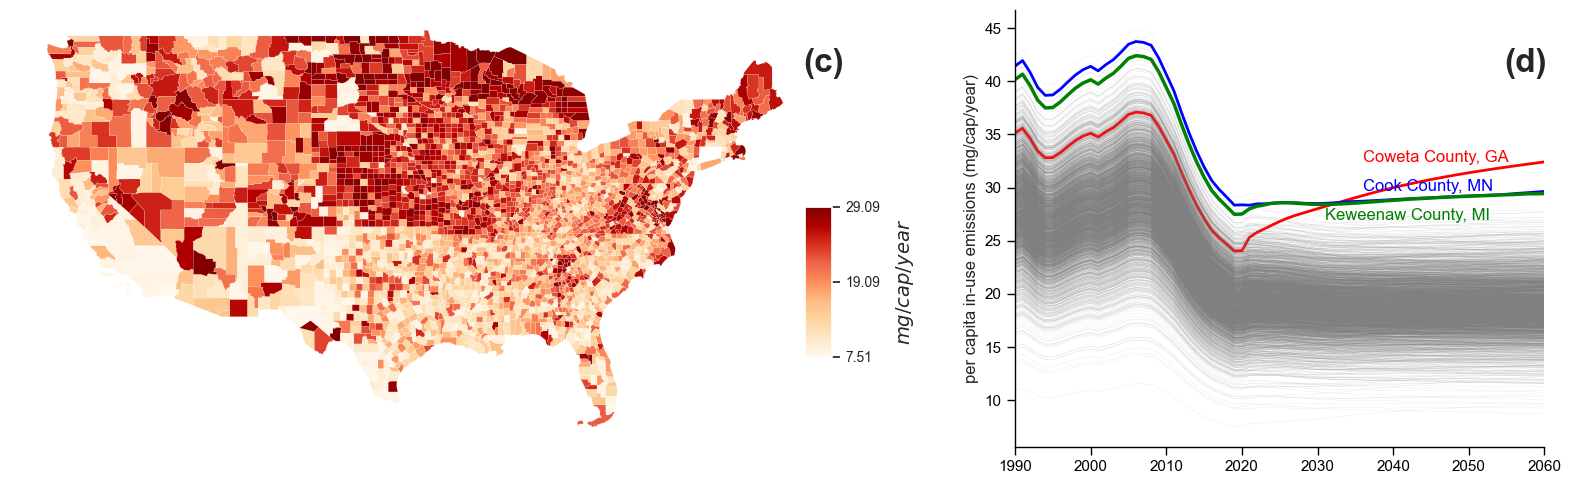

In [121]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

colormap = plt.cm.tab20  # Using the 'tab20' colormap which has 20 distinct colors
years = list(range(1990, 2061))

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
gdf.plot(column=column_to_plot, ax=ax0, cmap='OrRd', edgecolor='white', linewidth=0.1)
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=gdf[column_to_plot].min(), vmax=gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.57, 0.27, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$mg/cap/year$', fontsize=14, labelpad=10)
ax0.set_axis_off()

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in gdf_sub.iterrows():
    if index in highlighted:
        if index == 2671:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-30], row.iloc[-1]-2.5),
                fontsize=12, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-25], row.iloc[-1]),
                fontsize=12, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('per capita in-use emissions (mg/cap/year)')
ax1.set_xlim([1990, 2060])

fig.text(0.58, 0.84, '(c)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.97, 0.84, '(d)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()
# plt.savefig('inuse_high_percapita.png', dpi=1500, bbox_inches='tight')
# plt.savefig('inuse_high_percapita.pdf')

### in use stock emission

In [122]:
stock_high = pd.read_csv('County level analysis/Data source/InUseStock_High_StatusQuo.csv')
stock_high = counties[['GEOID', 'geometry']].merge(stock_high, left_on='GEOID', right_on='GeoID', how='inner')
stock_high['State'] = stock_high['County,State'].str.split(', ').str[1]

stock_high['2020_pct'] = stock_high['2020'].rank(pct=True)

column_to_plot = '2020_pct'
gdf = stock_high[~stock_high['State'].isin(['Hawaii', 'Alaska'])]

cols_to_remove = ['geometry', 'GEOID', 'GeoID', 'StID', 'County,State', 'State', '2020_pct']
gdf_sub = gdf.drop(columns=cols_to_remove)

C:\Users\hgazmeh\AppData\Local\Temp\3\ipykernel_11780\604615074.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


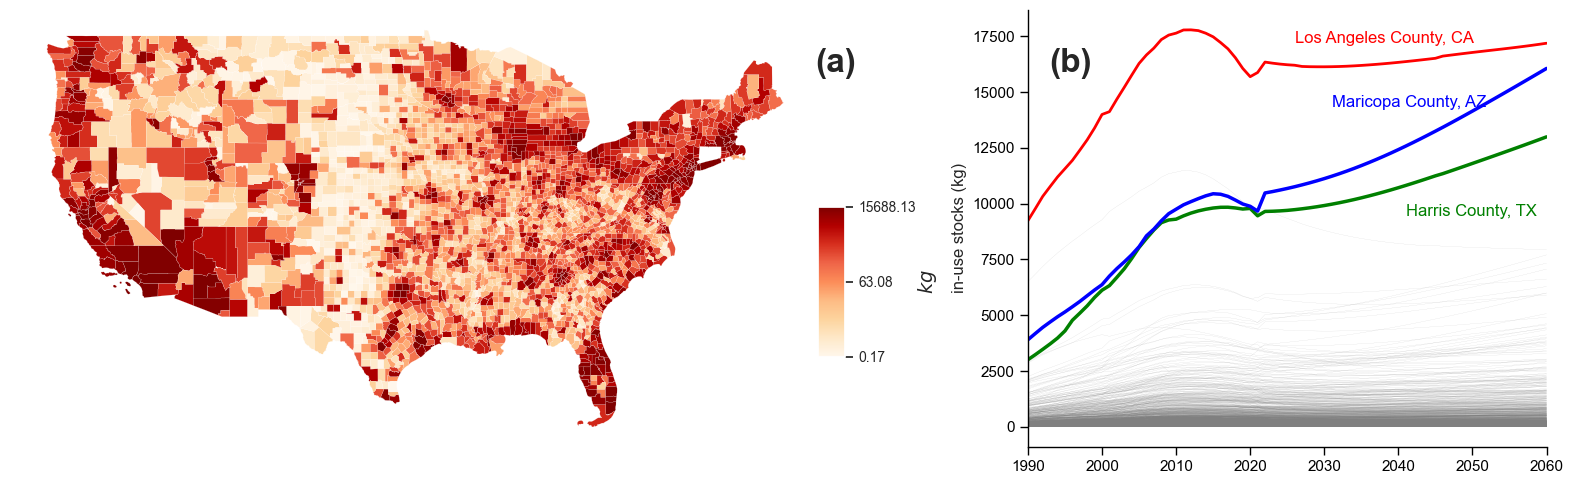

In [124]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
gdf.plot(column=column_to_plot, ax=ax0, cmap='OrRd', edgecolor='white', linewidth=0.1)
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=gdf[column_to_plot].min(), vmax=gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.57, 0.27, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$kg$', fontsize=14, labelpad=0)
ax0.set_axis_off()

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in gdf_sub.iterrows():
    if index in highlighted:
        if index == 1280:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-30], row.iloc[-10]),
                fontsize=12, color=highlight_colors[index])
        elif index == 829:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-50]),
                fontsize=12, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-35], row.iloc[-1]),
                fontsize=12, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('in-use stocks (kg)')
ax1.set_xlim([1990, 2060])
# make the yscale log
# ax1.set_yscale('log')

fig.text(0.58, 0.84, '(a)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.71, 0.84, '(b)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()
# plt.savefig('inuse_high_stock.png', dpi=1500, bbox_inches='tight')
# plt.savefig('inuse_high_stock.pdf')

### landfill accumulation status quo

In [3]:
landfill_accum = pd.read_csv('landfill_pfas_assignment_final.csv')


In [4]:
landfill_accum = pd.read_csv('landfill_pfas_assignment_final.csv')
landfill_accum = gpd.GeoDataFrame(landfill_accum, geometry=gpd.points_from_xy(landfill_accum['facility_x'], landfill_accum['facility_y']), crs='EPSG:4269')

cols_to_drop = ['DDRT_ID', 'facility_x', 'facility_y', 'Address', 'Zip', 'Latitude', 'Longitude', 'Region', 'Shape', 'County', 'State', 'GeoID']
landfill_accum_sub = landfill_accum.drop(columns=cols_to_drop)

In [5]:
states = gpd.read_file('tl_2020_us_state/tl_2020_us_state.shp')
states = states[['NAME', 'STATEFP', 'geometry']]

landfills_gdf = gpd.sjoin(states, landfill_accum_sub, how='right')
landfills_gdf.drop_duplicates(inplace=True)
landfills_gdf = landfills_gdf[~landfills_gdf['NAME'].isin(['Hawaii', 'Alaska'])]
landfills_gdf['2020_pct'] = landfills_gdf['2020'].rank(pct=True)

ploting_states = landfills_gdf['NAME'].unique().tolist()
states_sub = states[states['NAME'].isin(ploting_states)]

In [6]:
landfill_accum_leachate = pd.read_csv('landfill_emission_final.csv')
landfill_accum_leachate = gpd.GeoDataFrame(landfill_accum_leachate, geometry=gpd.points_from_xy(landfill_accum_leachate['facility_x'], landfill_accum_leachate['facility_y']), crs='EPSG:4269')
landfill_accum_leachate_sub = landfill_accum_leachate.drop(columns=cols_to_drop)

leachate_gdf = gpd.sjoin(states, landfill_accum_leachate_sub, how='right')
leachate_gdf.drop_duplicates(inplace=True)
leachate_gdf = leachate_gdf[~leachate_gdf['NAME'].isin(['Hawaii', 'Alaska'])]
leachate_gdf['2020_pct'] = leachate_gdf['2020'].rank(pct=True)

In [7]:
leachate_gdf

,index_left,NAME,STATEFP,Company,geometry,2020,2021,2022,2023,2024,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2020_pct
0,1,Florida,12,Vista Landfill LLC,POINT (-81.51235 28.63838),38.410835,84.256871,147.396609,160.804299,228.382000,...,2669.635801,2800.053344,2930.216265,3060.787614,3204.618434,3351.153182,3497.844607,3644.721631,3788.987471,0.912326
1,1,Florida,12,MID-FLORIDA MATERIALS CLASS III LANDFILL,POINT (-81.58074 28.73828),11.171355,24.712118,43.274232,47.211804,67.007229,...,745.773364,781.315001,816.889537,852.559886,891.793549,931.693263,971.594393,1011.693392,1051.077208,0.713542
2,1,Florida,12,"DESOTO RECYCLING &amp; DISPOSAL, LLC",POINT (-81.67092 27.20956),60.981489,121.859038,220.199984,246.299438,337.237562,...,3432.933891,3586.400076,3740.354661,3894.142329,4061.026837,4231.349778,4401.197055,4571.267350,4741.315736,0.949653
3,1,Florida,12,Cedar Trail Landfill,POINT (-81.88471 27.89958),22.934353,42.383497,76.646593,86.836304,121.297487,...,1229.356716,1286.568047,1344.088271,1401.809494,1465.105896,1529.619895,1594.364719,1659.553376,1724.156041,0.854167
4,1,Florida,12,Enterprise Landfill &amp; Recycling,POINT (-82.13434 28.32863),21.423313,49.053779,77.109958,86.514391,133.219160,...,1587.482583,1664.581243,1741.988289,1819.637810,1904.927016,1991.829000,2078.869833,2166.365255,2252.701540,0.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,19,Washington,53,Wells Avenue Inert Waste Landfill,POINT (-120.1695 47.38608),6.411562,14.762344,24.819623,31.341683,42.521658,...,481.181037,502.671381,524.373192,545.919697,569.387159,593.473966,617.394090,641.465212,665.532276,0.585938
1163,19,Washington,53,"Caton Limited Purpose Landfill, LLC",POINT (-120.78193 46.68716),0.884222,1.968573,3.151439,3.336189,5.263991,...,48.658013,50.729155,52.803484,54.871462,57.137026,59.443855,61.746341,64.046912,66.324299,0.187500
1164,19,Washington,53,Filion Inert Demo Site,POINT (-120.46264 47.52662),4.884322,11.383626,17.351416,17.541751,29.922104,...,299.258416,311.732798,324.276621,336.706197,350.146601,363.926153,377.587870,391.267902,404.964650,0.515625
1165,19,Washington,53,Graham Road Recycling &amp; Disp,POINT (-119.02074 46.27744),5.147242,11.500965,19.901275,24.033585,34.172829,...,481.720775,504.053197,526.317674,548.515406,572.846206,597.499796,622.082602,646.612907,670.694602,0.524306


In [8]:
cols_to_remove = ['geometry', '2020_pct', 'index_left', 'NAME', 'STATEFP', 'Company']
landfills_gdf_sub = landfills_gdf.drop(columns=cols_to_remove)
leachate_gdf_sub = leachate_gdf.drop(columns=cols_to_remove)

In [9]:
leachate_gdf_sub

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,38.410835,84.256871,147.396609,160.804299,228.382000,277.431785,336.122833,395.303912,454.970560,514.860186,...,2539.679059,2669.635801,2800.053344,2930.216265,3060.787614,3204.618434,3351.153182,3497.844607,3644.721631,3788.987471
1,11.171355,24.712118,43.274232,47.211804,67.007229,81.294694,98.294307,115.372488,132.524859,149.679100,...,710.344718,745.773364,781.315001,816.889537,852.559886,891.793549,931.693263,971.594393,1011.693392,1051.077208
2,60.981489,121.859038,220.199984,246.299438,337.237562,407.834664,490.330589,572.528612,654.651600,736.443384,...,3279.850108,3432.933891,3586.400076,3740.354661,3894.142329,4061.026837,4231.349778,4401.197055,4571.267350,4741.315736
3,22.934353,42.383497,76.646593,86.836304,121.297487,145.924021,174.728060,203.361859,231.895020,260.296423,...,1172.356719,1229.356716,1286.568047,1344.088271,1401.809494,1465.105896,1529.619895,1594.364719,1659.553376,1724.156041
4,21.423313,49.053779,77.109958,86.514391,133.219160,163.020644,198.584289,234.445333,270.571997,306.811462,...,1510.694085,1587.482583,1664.581243,1741.988289,1819.637810,1904.927016,1991.829000,2078.869833,2166.365255,2252.701540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,6.411562,14.762344,24.819623,31.341683,42.521658,51.947134,63.088230,74.315263,85.632979,96.993050,...,459.698807,481.181037,502.671381,524.373192,545.919697,569.387159,593.473966,617.394090,641.465212,665.532276
1163,0.884222,1.968573,3.151439,3.336189,5.263991,6.348973,7.606092,8.841232,10.054310,11.240288,...,46.588580,48.658013,50.729155,52.803484,54.871462,57.137026,59.443855,61.746341,64.046912,66.324299
1164,4.884322,11.383626,17.351416,17.541751,29.922104,36.343391,43.851529,51.330487,58.785119,66.194176,...,286.761820,299.258416,311.732798,324.276621,336.706197,350.146601,363.926153,377.587870,391.267902,404.964650
1165,5.147242,11.500965,19.901275,24.033585,34.172829,42.723306,53.103257,63.761583,74.683401,85.817912,...,459.320277,481.720775,504.053197,526.317674,548.515406,572.846206,597.499796,622.082602,646.612907,670.694602


In [10]:
column_to_plot = '2020_pct'
years = list(range(2020, 2061))

In [11]:
landfills_gdf

,index_left,NAME,STATEFP,Company,geometry,2020,2021,2022,2023,2024,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2020_pct
0,1,Florida,12,Vista Landfill LLC,POINT (-81.51235 28.63838),0.016524,0.037416,0.057470,0.077233,0.096892,...,1.081852,1.132421,1.182525,1.232429,1.287608,1.344530,1.401065,1.457236,1.511981,0.910026
1,1,Florida,12,MID-FLORIDA MATERIALS CLASS III LANDFILL,POINT (-81.58074 28.73828),0.004806,0.010974,0.016873,0.022676,0.028430,...,0.302439,0.316222,0.329919,0.343556,0.358610,0.374111,0.389490,0.404828,0.419775,0.692374
2,1,Florida,12,"DESOTO RECYCLING &amp; DISPOSAL, LLC",POINT (-81.67092 27.20956),0.024905,0.054329,0.083754,0.112677,0.141116,...,1.378458,1.437544,1.496456,1.554951,1.618581,1.684195,1.749194,1.813858,1.878110,0.941731
3,1,Florida,12,Cedar Trail Landfill,POINT (-81.88471 27.89958),0.009485,0.019944,0.030453,0.040688,0.050644,...,0.491303,0.513177,0.535022,0.556796,0.580753,0.605458,0.630070,0.654674,0.678885,0.835476
4,1,Florida,12,Enterprise Landfill &amp; Recycling,POINT (-82.13434 28.32863),0.009080,0.020415,0.031803,0.043282,0.054827,...,0.624767,0.653821,0.682789,0.711648,0.743455,0.776249,0.808849,0.841377,0.873237,0.825193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,19,Washington,53,Wells Avenue Inert Waste Landfill,POINT (-120.1695 47.38608),0.005397,0.012457,0.019479,0.026506,0.033543,...,0.364107,0.379691,0.395329,0.410757,0.427606,0.445085,0.462324,0.479560,0.496683,0.718937
1163,19,Washington,53,"Caton Limited Purpose Landfill, LLC",POINT (-120.78193 46.68716),0.000566,0.001218,0.001875,0.002517,0.003146,...,0.027884,0.029016,0.030142,0.031256,0.032481,0.033744,0.034994,0.036234,0.037452,0.200514
1164,19,Washington,53,Filion Inert Demo Site,POINT (-120.46264 47.52662),0.002416,0.005679,0.008850,0.011985,0.015086,...,0.144937,0.150721,0.156499,0.162190,0.168358,0.174749,0.181044,0.187304,0.193534,0.528706
1165,19,Washington,53,Graham Road Recycling &amp; Disp,POINT (-119.02074 46.27744),0.004407,0.010197,0.016091,0.022147,0.028351,...,0.382042,0.398986,0.415755,0.432352,0.450611,0.469344,0.487875,0.506222,0.524093,0.669237


C:\Users\mchen48\AppData\Local\Temp\ipykernel_2476\2690369635.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


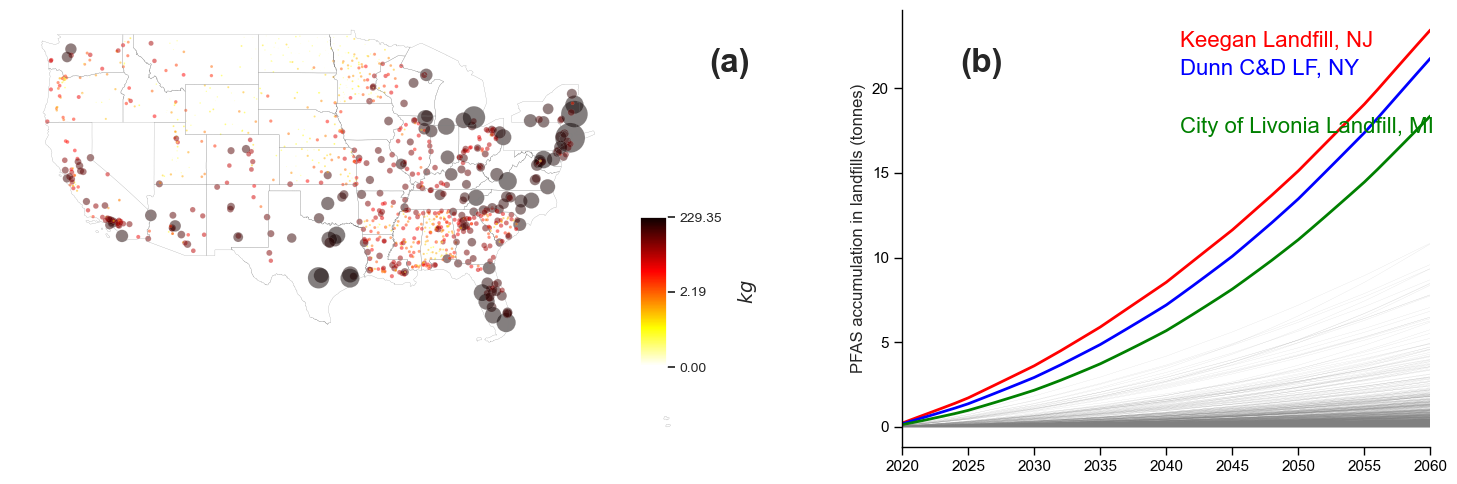

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
landfills_gdf.plot(column=column_to_plot, ax=ax0, cmap='hot_r', edgecolor='white', linewidth=0.1, markersize=landfills_gdf['2020']*2000, alpha=0.5)
states_sub.boundary.plot(ax=ax0, color='grey', linewidth=0.15)
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=landfills_gdf[column_to_plot].min(), vmax=landfills_gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.51, 0.25, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(landfills_gdf['2020']*1000, [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$kg$', fontsize=14, labelpad=10)
ax0.set_axis_off()

highlighted = {
    340: 'Keegan Landfill, NJ',
    351: 'Dunn C&D LF, NY',
    482: 'City of Livonia Landfill, MI'
}
highlight_colors = {
    340: 'red',
    351: 'blue',
    482: 'green'
}

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in landfills_gdf_sub.iterrows():
    if index in highlighted:
        if index == 0:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-27], row.iloc[-1]-2),
                fontsize=16, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-1]-1),
                fontsize=16, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('PFAS accumulation in landfills (tonnes)')
ax1.set_xlim([2020, 2060])
# make the yscale log
# ax1.set_yscale('log')

fig.text(0.56, 0.84, '(a)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.7, 0.84, '(b)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()

C:\Users\mchen48\AppData\Local\Temp\ipykernel_2476\1483935245.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


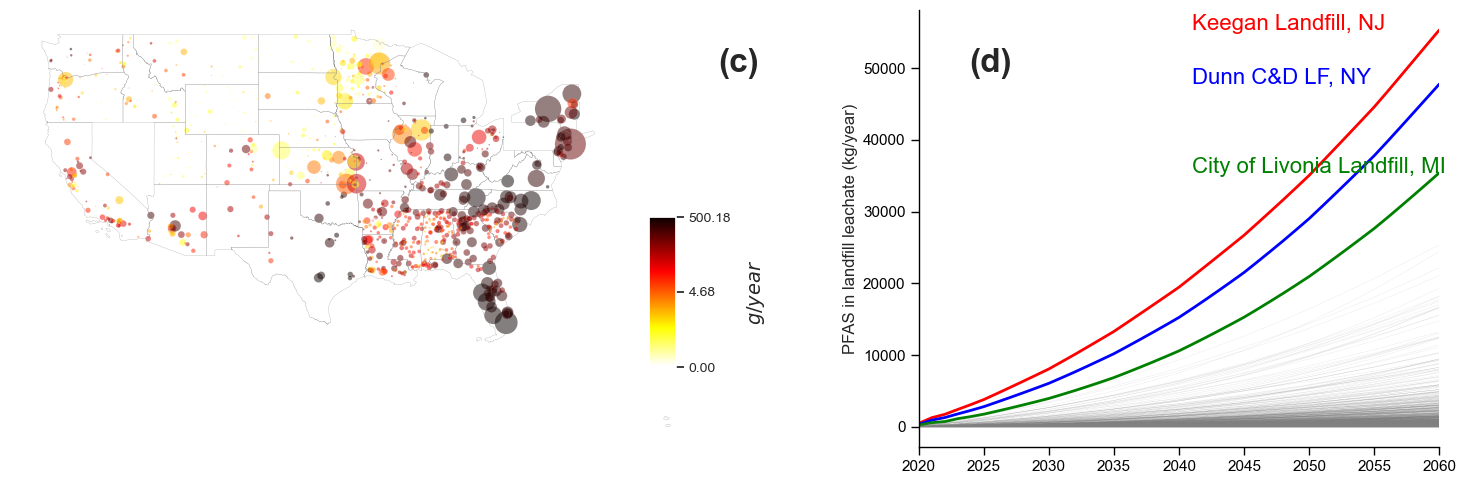

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
leachate_gdf.plot(column=column_to_plot, ax=ax0, cmap='hot_r', edgecolor='white', linewidth=0.1, markersize=leachate_gdf['2020']*1, alpha=0.5)
states_sub.boundary.plot(ax=ax0, color='grey', linewidth=0.15)
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=leachate_gdf[column_to_plot].min(), vmax=leachate_gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.51, 0.25, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.nanpercentile(leachate_gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$g/year$', fontsize=14, labelpad=10)
ax0.set_axis_off()

highlighted = {
    340: 'Keegan Landfill, NJ',
    351: 'Dunn C&D LF, NY',
    482: 'City of Livonia Landfill, MI'
}
highlight_colors = {
    340: 'red',
    351: 'blue',
    482: 'green'
}

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in leachate_gdf_sub.iterrows():
    if index in highlighted:
        if index == 1138:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-28], row.iloc[-1]+3),
                fontsize=16, color=highlight_colors[index])
        elif index == 1934:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-30], row.iloc[-1]-8),
                fontsize=16, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-1]-15),
                fontsize=16, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('PFAS emission throught landfill leachate & gas (g/year)')
ax1.set_xlim([2020, 2060])
fig.text(0.56, 0.84, '(c)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.7, 0.84, '(d)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()